In [1]:
import os
os.chdir('../../src')
os.listdir()

['utils', 'models', 'evaluate', 'configs', 'train', 'data']

set seed to 42

--------------------------------------------------

Training fold 3
{'in_freq': 240, 'pct_thresh': 0.01, 'lookahead': 2}


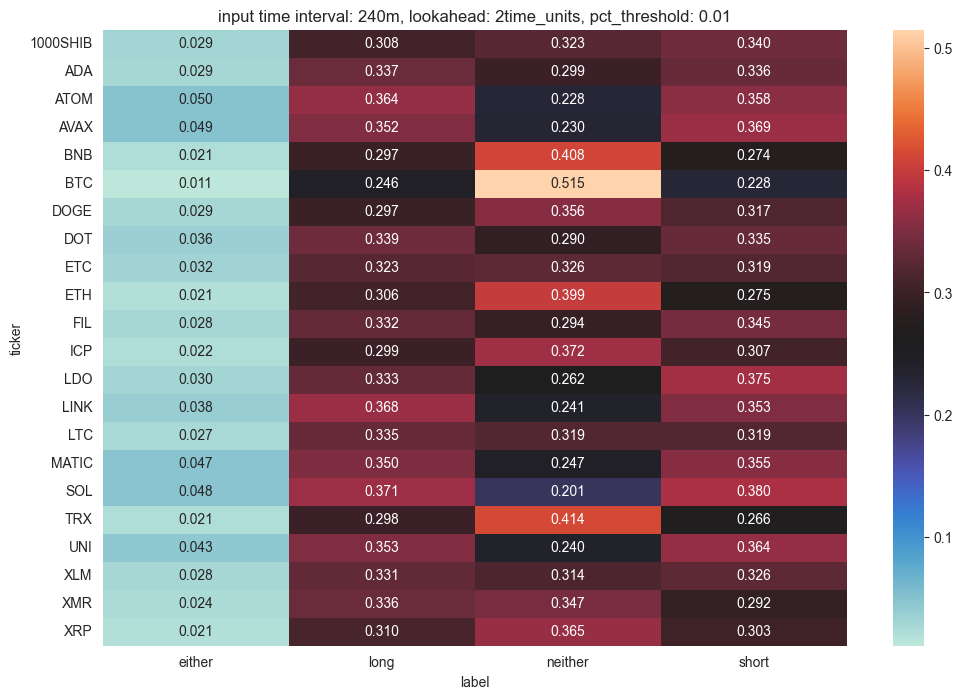

(94252, 10) (23767, 10)
Samples in train: 4746
Samples in valid: 4365
Class weights: [0.6783882406698287, 0.6734134364763198, 0.6791476545053191, 0.9690506683485324]
Baseline:

>>> [2023-12-20 12:07:53.352262 | 0/1000 | Early stopping counter 0] 
    loss          - train: 1.379663      valid: 1.389759 
    score         - train: 0.135652     valid: 0.125064 
    learning rate        : 5.00000e-05



Epoch 1: 100%|██████████| 297/297 [00:58<00:00,  5.05it/s, batch_loss=1.239626, epoch_loss=1.343566, learning_rate=5e-5]



>>> [2023-12-20 12:08:55.389298 | 1/1000 | Early stopping counter 0] 
    loss          - train: 1.286664      valid: 1.322644 
    score         - train: 0.135652     valid: 0.125064 
    learning rate        : 5.00000e-05



Epoch 2: 100%|██████████| 297/297 [00:59<00:00,  4.99it/s, batch_loss=1.180206, epoch_loss=1.246059, learning_rate=5e-5]


>>> [2023-12-20 12:10:05.588040] - Checkpoint and predictions saved

>>> [2023-12-20 12:10:05.591895 | 2/1000 | Early stopping counter 0] 
    loss          - train: 1.226480      valid: 1.257665 
    score         - train: 0.210005     valid: 0.154130 
    learning rate        : 5.00000e-05



Epoch 3: 100%|██████████| 297/297 [00:58<00:00,  5.07it/s, batch_loss=1.145769, epoch_loss=1.226121, learning_rate=5e-5]



>>> [2023-12-20 12:11:07.508218 | 3/1000 | Early stopping counter 1] 
    loss          - train: 1.223056      valid: 1.250921 
    score         - train: 0.208803     valid: 0.124290 
    learning rate        : 5.00000e-05



Epoch 4:   3%|▎         | 8/297 [00:01<00:58,  4.94it/s, batch_loss=1.376420, epoch_loss=1.249713, learning_rate=5e-5]

In [2]:
from configs.config import Config, INPUT_FREQ, PCT_THRESHOLDS, HORIZONS
from train.train import train_model

# fold is fixed to 3
seed = 42
for in_freq in INPUT_FREQ[::-1]:
    for lookahead in HORIZONS:
        for pct_thresh in PCT_THRESHOLDS:
            
            config = Config()
            config.data_dir = '../data'
            config.models_dir = '../models'
            config.horizon_def = {
                'in_freq' : in_freq,
                'pct_thresh': pct_thresh / 100.,
                'lookahead': lookahead
            }

            config.max_len = 128
            config.fold = 3
            config.model_name = f'hslstm/in_freq{in_freq}m-lookahead{lookahead}-pct_thresh{pct_thresh}-seed{seed}'

            config.sample_run = True
            config.apply_seed(seed = seed)
            results = train_model(config = config)